In [2]:
DF_PATH = r"../data/raw/explored_df.pkl"
EXPORT_PATH = r"../data/processed"
RAW_PATH = r"../data/raw"

In [3]:
print(DF_PATH)

../data/raw/explored_df.pkl


In [4]:
# Load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
import joblib

## imbalance
from imblearn.over_sampling import SMOTE

## skelarn -- preprocessing
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, LabelEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn_features.transformers import DataFrameSelector


In [5]:
df = pd.read_pickle(DF_PATH)
df.head().T

,0,1,2,3,4
gender,Female,Male,Male,Male,Female
age,37,46,50,78,75
married,Yes,No,No,Yes,Yes
number_of_dependents,0,0,0,0,0
number_of_referrals,2,0,0,1,3
tenure_in_months,9,9,4,13,3
offer,NaN,NaN,Offer E,Offer D,NaN
phone_service,Yes,Yes,Yes,Yes,Yes
avg_monthly_long_distance_charges,42.39,10.69,33.65,27.82,7.38
multiple_lines,No,Yes,No,No,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6589 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             6589 non-null   object 
 1   age                                6589 non-null   int64  
 2   married                            6589 non-null   object 
 3   number_of_dependents               6589 non-null   int64  
 4   number_of_referrals                6589 non-null   int64  
 5   tenure_in_months                   6589 non-null   int64  
 6   offer                              2991 non-null   object 
 7   phone_service                      6589 non-null   object 
 8   avg_monthly_long_distance_charges  5945 non-null   float64
 9   multiple_lines                     6589 non-null   object 
 10  internet_service                   6589 non-null   object 
 11  internet_type                      6589 non-null   object 
 1

In [7]:
df.reset_index(inplace=True, drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6589 entries, 0 to 6588
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             6589 non-null   object 
 1   age                                6589 non-null   int64  
 2   married                            6589 non-null   object 
 3   number_of_dependents               6589 non-null   int64  
 4   number_of_referrals                6589 non-null   int64  
 5   tenure_in_months                   6589 non-null   int64  
 6   offer                              2991 non-null   object 
 7   phone_service                      6589 non-null   object 
 8   avg_monthly_long_distance_charges  5945 non-null   float64
 9   multiple_lines                     6589 non-null   object 
 10  internet_service                   6589 non-null   object 
 11  internet_type                      6589 non-null   objec

In [8]:
df.describe()

,age,number_of_dependents,number_of_referrals,tenure_in_months,avg_monthly_long_distance_charges,avg_monthly_gb_download,total_revenue
count,6589.000000,6589.000000,6589.000000,6589.000000,5945.000000,5245.000000,6589.000000
mean,46.760510,0.476097,2.020944,34.499772,25.496246,26.225929,3235.218082
std,16.841362,0.968499,3.024016,23.968734,14.198424,19.565724,2854.600036
min,19.000000,0.000000,0.000000,1.000000,1.010000,2.000000,21.610000
25%,33.000000,0.000000,0.000000,12.000000,13.140000,13.000000,835.450000
50%,46.000000,0.000000,0.000000,32.000000,25.720000,21.000000,2376.450000
75%,60.000000,0.000000,3.000000,57.000000,37.690000,30.000000,5106.640000
max,80.000000,9.000000,11.000000,72.000000,49.990000,85.000000,11979.340000


In [9]:
df.isna().sum()

gender                                  0
age                                     0
married                                 0
number_of_dependents                    0
number_of_referrals                     0
tenure_in_months                        0
offer                                3598
phone_service                           0
avg_monthly_long_distance_charges     644
multiple_lines                          0
internet_service                        0
internet_type                           0
avg_monthly_gb_download              1344
online_security                         0
online_backup                           0
device_protection_plan                  0
premium_tech_support                    0
streaming_tv                            0
streaming_movies                        0
streaming_music                         0
unlimited_data                          0
contract                                0
paperless_billing                       0
payment_method                    

In [10]:
df[['avg_monthly_long_distance_charges', 'avg_monthly_gb_download']].describe()

,avg_monthly_long_distance_charges,avg_monthly_gb_download
count,5945.000000,5245.000000
mean,25.496246,26.225929
std,14.198424,19.565724
min,1.010000,2.000000
25%,13.140000,13.000000
50%,25.720000,21.000000
75%,37.690000,30.000000
max,49.990000,85.000000


array([[<Axes: title={'center': 'avg_monthly_long_distance_charges'}>,
        <Axes: title={'center': 'avg_monthly_gb_download'}>]],
      dtype=object)

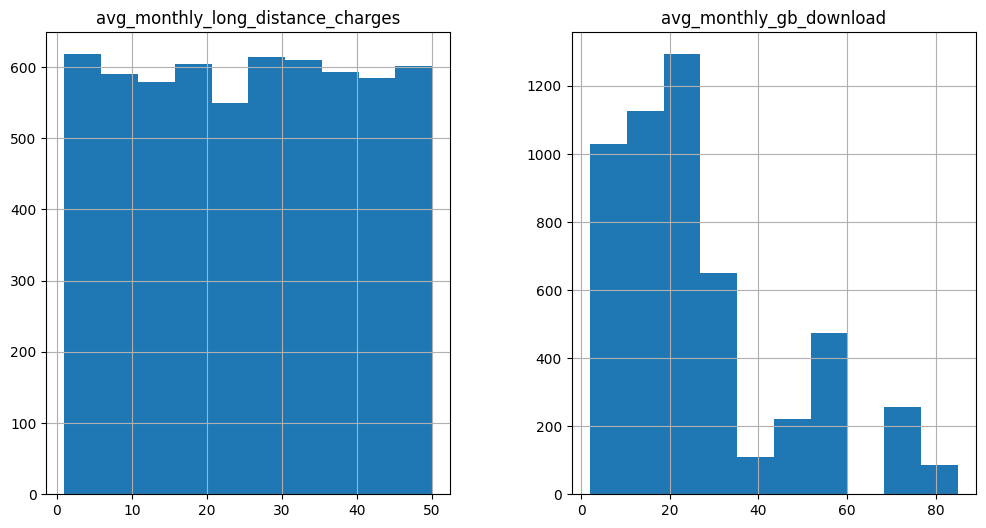

In [11]:
df[['avg_monthly_long_distance_charges', 'avg_monthly_gb_download']].hist(figsize=(12,6))

### Split data into train and test

In [12]:
df.columns

Index(['gender', 'age', 'married', 'number_of_dependents',
       'number_of_referrals', 'tenure_in_months', 'offer', 'phone_service',
       'avg_monthly_long_distance_charges', 'multiple_lines',
       'internet_service', 'internet_type', 'avg_monthly_gb_download',
       'online_security', 'online_backup', 'device_protection_plan',
       'premium_tech_support', 'streaming_tv', 'streaming_movies',
       'streaming_music', 'unlimited_data', 'contract', 'paperless_billing',
       'payment_method', 'total_revenue', 'customer_status'],
      dtype='object')

In [13]:
cols = ['online_security', 'online_backup', 'device_protection_plan',
       'premium_tech_support', 'streaming_tv', 'streaming_movies',
       'streaming_music']
for col in cols:
    print(df[col].value_counts())

online_security
No     4616
Yes    1973
Name: count, dtype: int64
online_backup
No     4214
Yes    2375
Name: count, dtype: int64
device_protection_plan
No     4199
Yes    2390
Name: count, dtype: int64
premium_tech_support
No     4592
Yes    1997
Name: count, dtype: int64
streaming_tv
No     3931
Yes    2658
Name: count, dtype: int64
streaming_movies
No     3906
Yes    2683
Name: count, dtype: int64
streaming_music
No     4153
Yes    2436
Name: count, dtype: int64


### Feature Engineering
- Create `enrolled_services` feature that is the sum of all internet services the customer is enrolled to

In [14]:
DICT_REPLACE = {'Yes': 1, 'No': 0}
df_internet = df[cols].replace(DICT_REPLACE)
df_internet.head()

,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music
0,0,1,0,1,1,0,0
1,0,0,0,0,0,1,1
2,0,0,1,0,0,0,0
3,0,1,1,0,1,1,0
4,0,0,0,1,1,0,0


In [15]:
df_internet['enrolled_services'] = np.sum(df_internet, axis=1)
df_internet.head()

,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,enrolled_services
0,0,1,0,1,1,0,0,3
1,0,0,0,0,0,1,1,2
2,0,0,1,0,0,0,0,1
3,0,1,1,0,1,1,0,4
4,0,0,0,1,1,0,0,2


In [16]:
for col in df_internet.columns.to_list():
    print(df_internet[col].value_counts())

online_security
0    4616
1    1973
Name: count, dtype: int64
online_backup
0    4214
1    2375
Name: count, dtype: int64
device_protection_plan
0    4199
1    2390
Name: count, dtype: int64
premium_tech_support
0    4592
1    1997
Name: count, dtype: int64
streaming_tv
0    3931
1    2658
Name: count, dtype: int64
streaming_movies
0    3906
1    2683
Name: count, dtype: int64
streaming_music
0    4153
1    2436
Name: count, dtype: int64
enrolled_services
0    1885
3     871
4     839
2     822
1     742
5     680
6     493
7     257
Name: count, dtype: int64


In [17]:
df['enrolled_services'] = df_internet['enrolled_services']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6589 entries, 0 to 6588
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             6589 non-null   object 
 1   age                                6589 non-null   int64  
 2   married                            6589 non-null   object 
 3   number_of_dependents               6589 non-null   int64  
 4   number_of_referrals                6589 non-null   int64  
 5   tenure_in_months                   6589 non-null   int64  
 6   offer                              2991 non-null   object 
 7   phone_service                      6589 non-null   object 
 8   avg_monthly_long_distance_charges  5945 non-null   float64
 9   multiple_lines                     6589 non-null   object 
 10  internet_service                   6589 non-null   object 
 11  internet_type                      6589 non-null   objec

In [18]:
df.drop(columns=['customer_status', 'gender']).columns

Index(['age', 'married', 'number_of_dependents', 'number_of_referrals',
       'tenure_in_months', 'offer', 'phone_service',
       'avg_monthly_long_distance_charges', 'multiple_lines',
       'internet_service', 'internet_type', 'avg_monthly_gb_download',
       'online_security', 'online_backup', 'device_protection_plan',
       'premium_tech_support', 'streaming_tv', 'streaming_movies',
       'streaming_music', 'unlimited_data', 'contract', 'paperless_billing',
       'payment_method', 'total_revenue', 'enrolled_services'],
      dtype='object')

In [17]:
## To features and target
X = df.drop(columns=['customer_status', 'gender', 'online_security', 'online_backup', 'device_protection_plan',
       'premium_tech_support', 'streaming_tv', 'streaming_movies', 'streaming_music'])
y = df['customer_status']

## Split to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42, stratify=y)

## Check shapes
print('X_train.shape \t', X_train.shape)
print('y_train.shape \t', y_train.shape)
print('***'*10)
print('X_test.shape \t', X_test.shape)
print('y_test.shape \t', y_test.shape)

e:\Epsilon_DS\finalProject\STREAMLIT\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
e:\Epsilon_DS\finalProject\STREAMLIT\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


X_train.shape 	 (5271, 18)
y_train.shape 	 (5271,)
******************************
X_test.shape 	 (1318, 18)
y_test.shape 	 (1318,)


#### Save Train and Test data for later use to train and test the best model on them

In [18]:
# saving training set
with open(os.path.join(RAW_PATH, 'X_train_total.pkl'), 'wb') as f:
    pickle.dump(X_train,f)


# saving y_train
with open(os.path.join(RAW_PATH, 'y_train_total.pkl'), 'wb') as f:
    pickle.dump(y_train,f)


### Split training data into train and validation sets

In [19]:
## Split to train and val
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=True, random_state=42, stratify=y_train)

## Check shapes
print('X_train.shape \t', X_train.shape)
print('y_train.shape \t', y_train.shape)
print('***'*10)
print('X_test.shape \t', X_val.shape)
print('y_test.shape \t', y_val.shape)

X_train.shape 	 (4216, 18)
y_train.shape 	 (4216,)
******************************
X_test.shape 	 (1055, 18)
y_test.shape 	 (1055,)


e:\Epsilon_DS\finalProject\STREAMLIT\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
e:\Epsilon_DS\finalProject\STREAMLIT\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [39]:
y_train.value_counts().iloc[1] / len(y_train)

0.2836812144212524

e:\Epsilon_DS\finalProject\STREAMLIT\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Epsilon_DS\finalProject\STREAMLIT\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Epsilon_DS\finalProject\STREAMLIT\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Epsilon_DS\finalProject\STREAMLIT\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

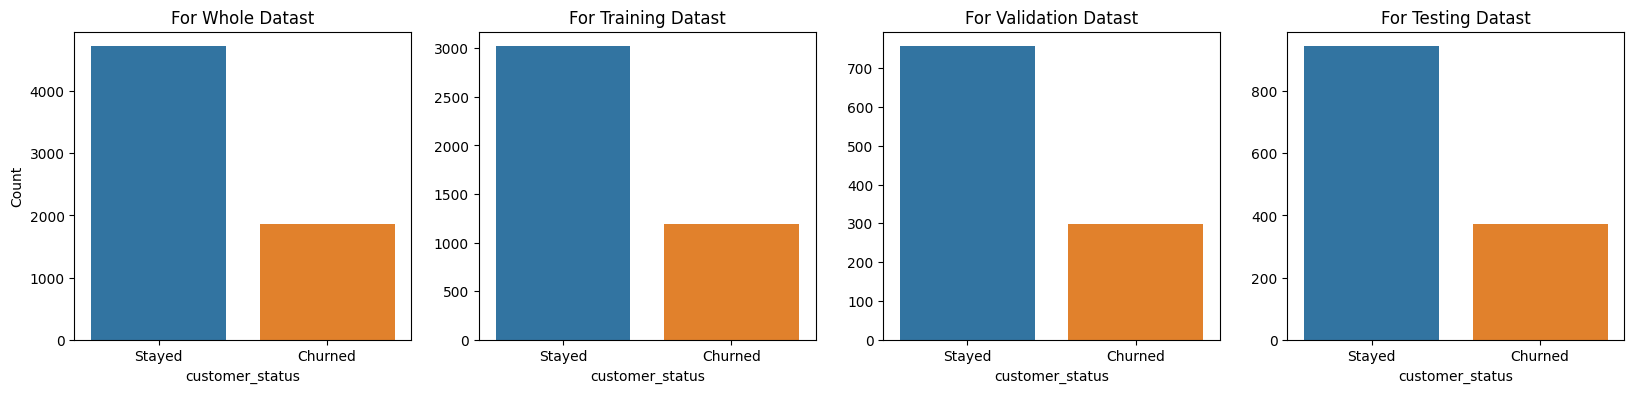

In [21]:
## plottting to check
fig, ax = plt.subplots(1,4, figsize=(20, 4))

## Whole dataset
plt.sca(ax[0])
sns.countplot(x=y)
plt.title('For Whole Datast')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Stayed', 'Churned'])

## train
plt.sca(ax[1])
sns.countplot(x=y_train)
plt.title('For Training Datast')
plt.ylabel('')
plt.xticks(ticks=[0, 1], labels=['Stayed', 'Churned'])

## validation
plt.sca(ax[2])
sns.countplot(x=y_val)
plt.title('For Validation Datast')
plt.ylabel('')
plt.xticks(ticks=[0, 1], labels=['Stayed', 'Churned'])


## test
plt.sca(ax[3])
sns.countplot(x=y_test)
plt.title('For Testing Datast')
plt.ylabel('')
plt.xticks(ticks=[0, 1], labels=['Stayed', 'Churned'])
plt.show()

### Creating Pipeline for data preprocessing

In [22]:
X_train.dtypes

age                                    int64
married                               object
number_of_dependents                   int64
number_of_referrals                    int64
tenure_in_months                       int64
offer                                 object
phone_service                         object
avg_monthly_long_distance_charges    float64
multiple_lines                        object
internet_service                      object
internet_type                         object
avg_monthly_gb_download              float64
unlimited_data                        object
contract                              object
paperless_billing                     object
payment_method                        object
total_revenue                        float64
enrolled_services                      int64
dtype: object

In [23]:
X_train.select_dtypes(include='O').nunique()

married              2
offer                5
phone_service        2
multiple_lines       2
internet_service     2
internet_type        4
unlimited_data       2
contract             3
paperless_billing    2
payment_method       3
dtype: int64

In [24]:
num_cols = ['age', 'number_of_dependents', 'number_of_referrals', 'tenure_in_months', 'avg_monthly_long_distance_charges',
            'avg_monthly_gb_download', 'total_revenue', 'enrolled_services']

cat_cols = ['married', 'phone_service', 'multiple_lines', 'internet_service', 'unlimited_data', 'paperless_billing', 'offer', 'payment_method']

ord_cols_1 = ['internet_type']
ord_cols_2 = ['contract']


In [25]:
## Pipeline

## Numerical: num_cols --> Imputing using median, and standardscaler
## Categorical: cat_cols ---> Imputing using mode, and OHE
## Ordinal: ord_cols_1, ord_cols_2 ---> Imputing using mode, and ordinalEncoder

## For Numerical
num_pipeline = Pipeline(steps=[
                        ('selector', DataFrameSelector(num_cols)),
                        ('imputer', SimpleImputer(strategy='median')),
                        ('scaler', MinMaxScaler())
                    ])


## For Categorical
cat_pipeline = Pipeline(steps=[
                        ('selector', DataFrameSelector(cat_cols)),
                        ('imputer', SimpleImputer(strategy='most_frequent')),
                        ('ohe', OneHotEncoder(drop='first', sparse_output=False))
                    ])


## For ord_cols_1
ordinal_pipeline_1 = Pipeline(steps=[
                        ('selector', DataFrameSelector(ord_cols_1)),
                        ('imputer', SimpleImputer(strategy='most_frequent')),
                        ('encoder',OrdinalEncoder(categories=[['No', 'Cable', 'DSL', 'Fiber Optic']]))
                    ])


## For ord_cols_1
ordinal_pipeline_2 = Pipeline(steps=[
                        ('selector', DataFrameSelector(ord_cols_2)),
                        ('imputer', SimpleImputer(strategy='most_frequent')),
                        ('encoder',OrdinalEncoder(categories=[['Month-to-Month', 'One Year', 'Two Year']]))
                    ])


## combine all
all_pipeline = FeatureUnion(transformer_list=[
                                    ('numerical', num_pipeline),
                                    ('categorical', cat_pipeline),
                                    ('ord_1', ordinal_pipeline_1),
                                    ('ord_2', ordinal_pipeline_2)
                                ])

## apply
X_train_final = all_pipeline.fit_transform(X_train)
X_val_final = all_pipeline.transform(X_val)
# X_test_final = all_pipeline.transform(X_test)

e:\Epsilon_DS\finalProject\STREAMLIT\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
e:\Epsilon_DS\finalProject\STREAMLIT\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
e:\Epsilon_DS\finalProject\STREAMLIT\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
e:\Epsilon_DS\finalProject\STREAMLIT\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check 

In [26]:
print(X_train_final.shape)
print(X_val_final.shape)

(4216, 22)
(1055, 22)


### Solving class imbalance using SMOTE for over sampling

In [27]:
# transform target
le = LabelEncoder()
y_train_final = le.fit_transform(y_train)
y_val_final = le.transform(y_val)

e:\Epsilon_DS\finalProject\STREAMLIT\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
e:\Epsilon_DS\finalProject\STREAMLIT\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
e:\Epsilon_DS\finalProject\STREAMLIT\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
e:\Epsilon_DS\finalProject\STREAMLIT\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if

In [28]:
y_train_final[:5]

array([1, 1, 1, 1, 0])

In [29]:
y_val_final[:5]

array([1, 0, 0, 1, 0])

In [30]:
over = SMOTE(sampling_strategy=0.8, random_state=42)
X_train_resampled, y_train_resampled = over.fit_resample(X_train_final, y_train_final)

In [31]:
print(X_train_resampled.shape)
print(y_train_resampled.shape)

(5436, 22)
(5436,)


### Saving processed datasets

In [32]:
with open(os.path.join(EXPORT_PATH, 'X_train.pkl'), 'wb') as f:
    pickle.dump(X_train_resampled,f)

In [33]:
with open(os.path.join(EXPORT_PATH, 'X_val.pkl'), 'wb') as f:
    pickle.dump(X_val_final,f)

In [34]:
with open(os.path.join(EXPORT_PATH, 'y_train.pkl'), 'wb') as f:
    pickle.dump(y_train_resampled,f)

In [35]:
with open(os.path.join(EXPORT_PATH, 'y_val.pkl'), 'wb') as f:
    pickle.dump(y_val_final,f)

In [36]:
with open(os.path.join(EXPORT_PATH, 'X_test.pkl'), 'wb') as f:
    pickle.dump(X_test,f)

In [37]:
with open(os.path.join(EXPORT_PATH, 'y_test.pkl'), 'wb') as f:
    pickle.dump(y_test,f)